In [2]:
import pandas as pd
#import and merge the data
df_2016_implicate = pd.read_sas('nsch_2016_implicate.sas7bdat')
df_2016_topical = pd.read_sas('nsch_2016_topical.sas7bdat')
nsch_2016 = pd.merge(df_2016_topical, df_2016_implicate, on='HHID')
nsch_2017 = pd.read_sas('nsch_2017_topical.sas7bdat')

col_2016 = set(nsch_2016.columns)
col_2017 = set(nsch_2017.columns)
common_col = list(col_2016.intersection(col_2017))
data = pd.concat([nsch_2016[common_col], nsch_2017[common_col]])

In [3]:
interested_var = ['SC_AGE_YEARS', 'SC_RACE_R', 'K2Q01', 'K6Q71_R', 'K6Q72_R', 'K7Q84_R',\
                  'K7Q85_R', 'K7Q82_R', 'K7Q83_R', 'BULLIED', 'K7Q70_R',\
                  'MEMORYCOND', 'ERRANDALONE', 'HEADACHE', 'K2Q33A', 'K2Q32A', 'K2Q34A',\
                  'SUBABUSE', 'K2Q31A', 'HCABILITY', 'K2Q05', 'BIRTHWT_VL', 'MOMAGE',\
                  'WGTCONC', 'K4Q01', 'TREATNEED', 'CONFIDENT', 'NEWACTIVITY', 'HURTSAD',\
                  'CALMDOWN', 'TEMPER', 'K7Q04R_R', 'REPEATED', 'K7Q30', 'K7Q31', 'K7Q32',\
                  'K7Q37', 'PHYSACTIV', 'MAKEFRIEND', 'K11Q43R', 'BEDTIME', 'HOURSLEEP05',\
                  'HOURSLEEP', 'K7Q60_R', 'K7Q91_R', 'K6Q60_R', 'K6Q61_R', 'K8Q21',\
                  'K8Q30', 'K8Q31', 'K8Q32', 'K8Q34', 'K8Q35', 'K6Q20', 'K8Q11', 'K9Q40',\
                  'K9Q41', 'TALKABOUT', 'WKTOSOLVE', 'STRENGTHS', 'HOPEFUL', 'ACE1',\
                  'FOODSIT', 'K11Q60', 'K11Q61', 'K11Q62', 'S9Q34', 'K10Q11', 'K10Q12',\
                  'K10Q13', 'K10Q14', 'K10Q20', 'K10Q22', 'K10Q23', 'K10Q30', 'K10Q31',\
                  'K10Q40_R', 'GOFORHELP', 'K10Q41_R', 'K9Q96', 'ACE3', 'ACE4', 'ACE5',\
                  'ACE6', 'ACE7', 'ACE8', 'ACE9', 'ACE10', 'A1_PHYSHEALTH', 'A1_MENTHEALTH']

In [4]:
data = data[interested_var]

In [5]:
data = data.dropna(axis='columns', thresh=data.shape[0]*0.5).dropna()

In [6]:
data.columns

Index(['SC_AGE_YEARS', 'SC_RACE_R', 'K2Q01', 'K6Q71_R', 'K7Q84_R', 'K7Q85_R',
       'K7Q82_R', 'K7Q83_R', 'BULLIED', 'K7Q70_R', 'MEMORYCOND', 'HEADACHE',
       'K2Q33A', 'K2Q32A', 'K2Q34A', 'SUBABUSE', 'K2Q31A', 'HCABILITY',
       'K2Q05', 'BIRTHWT_VL', 'MOMAGE', 'WGTCONC', 'K4Q01', 'K7Q04R_R',
       'REPEATED', 'K7Q30', 'K7Q31', 'K7Q32', 'K7Q37', 'PHYSACTIV',
       'MAKEFRIEND', 'K11Q43R', 'BEDTIME', 'HOURSLEEP', 'K7Q60_R', 'K7Q91_R',
       'K8Q21', 'K8Q30', 'K8Q31', 'K8Q32', 'K8Q34', 'K8Q35', 'K8Q11', 'K9Q40',
       'TALKABOUT', 'WKTOSOLVE', 'STRENGTHS', 'HOPEFUL', 'ACE1', 'FOODSIT',
       'K11Q60', 'K11Q61', 'K11Q62', 'S9Q34', 'K10Q11', 'K10Q12', 'K10Q13',
       'K10Q14', 'K10Q20', 'K10Q22', 'K10Q23', 'K10Q30', 'K10Q31', 'K10Q40_R',
       'GOFORHELP', 'K10Q41_R', 'K9Q96', 'ACE3', 'ACE4', 'ACE5', 'ACE6',
       'ACE7', 'ACE8', 'ACE9', 'ACE10', 'A1_PHYSHEALTH', 'A1_MENTHEALTH'],
      dtype='object')

In [7]:
data['ACE'] = (2-data['ACE3']) +\
           (2-data['ACE4']) +\
           (2-data['ACE5']) +\
           (2-data['ACE6']) +\
           (2-data['ACE7']) +\
           (2-data['ACE8']) +\
           (2-data['ACE9']) +\
           (2-data['ACE10'])

In [8]:
data.shape

(34821, 78)

In [9]:
#train test split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from pyearth import Earth
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import RandomizedSearchCV
warnings.filterwarnings('ignore')


X = data.drop(columns=['K2Q32A'])
y = data['K2Q32A']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=42) 

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
sampler1 = RandomUnderSampler(random_state=42)
sampler2 = SMOTE(random_state=42)
sampler3 = ADASYN(random_state=42)
sampler4 = RandomOverSampler(random_state=42)

sampler = [sampler1, sampler2, sampler3, sampler4]

In [188]:
#Decision tree

for s in sampler:
    dt_clf = Pipeline([('sampler', s), ('dt', DecisionTreeClassifier())])
    dt_params = {'dt__criterion': ['gini', 'entropy'],\
                 'dt__splitter': ['best', 'random'],\
                 'dt__max_depth': [None, 2, 3, 4, 5, 6, 7, 50, 100, 1000],\
                }

    dt_tune = RandomizedSearchCV(dt_clf, dt_params, cv=10, scoring='accuracy').fit(X_train, y_train)

    print("Decision tree:")
    print(dt_tune.best_params_)

Decision tree:
{'dt__splitter': 'best', 'dt__max_depth': 2, 'dt__criterion': 'gini'}
Decision tree:
{'dt__splitter': 'best', 'dt__max_depth': 7, 'dt__criterion': 'entropy'}
Decision tree:
{'dt__splitter': 'best', 'dt__max_depth': 7, 'dt__criterion': 'gini'}
Decision tree:
{'dt__splitter': 'random', 'dt__max_depth': None, 'dt__criterion': 'gini'}


In [11]:
dt1 = make_pipeline(sampler1, DecisionTreeClassifier(criterion='gini', max_depth=2, splitter='best'))
dt2 = make_pipeline(sampler2, DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='best'))
dt3 = make_pipeline(sampler3, DecisionTreeClassifier(criterion='gini', max_depth=7, splitter='best'))
dt4 = make_pipeline(sampler4, DecisionTreeClassifier(criterion='gini', max_depth=None, splitter='random'))

In [189]:
#Bagging
for s in sampler:
    bg_clf = Pipeline([('sampler', s), ('bg', BaggingClassifier())])
    bg_params = {'bg__n_estimators': [10, 15, 20, 25, 30, 35, 40, 50, 70, 100, 200],\
                 'bg__max_samples': [1, 2, 3, 4, 5, 6, 7, 8, 9],\
                 'bg__max_features': [1.0, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],\
                 'bg__bootstrap':[True, False],\
                 'bg__bootstrap_features': [True, False]}

    bg_tune = RandomizedSearchCV(bg_clf, bg_params, cv=10, scoring='accuracy').fit(X_train, y_train)

    print("Bagging:")
    print(bg_tune.best_params_)

Bagging:
{'bg__n_estimators': 100, 'bg__max_samples': 5, 'bg__max_features': 0.2, 'bg__bootstrap_features': False, 'bg__bootstrap': False}
Bagging:
{'bg__n_estimators': 100, 'bg__max_samples': 5, 'bg__max_features': 0.8, 'bg__bootstrap_features': True, 'bg__bootstrap': True}
Bagging:
{'bg__n_estimators': 100, 'bg__max_samples': 6, 'bg__max_features': 1.0, 'bg__bootstrap_features': False, 'bg__bootstrap': False}
Bagging:
{'bg__n_estimators': 200, 'bg__max_samples': 4, 'bg__max_features': 0.6, 'bg__bootstrap_features': False, 'bg__bootstrap': True}


In [12]:
bg1=make_pipeline(sampler1, BaggingClassifier(n_estimators=100, max_samples=5,\
                                             max_features=0.2, bootstrap_features=False, bootstrap=False))
bg2=make_pipeline(sampler2, BaggingClassifier(n_estimators=100, max_samples=5,\
                                             max_features=0.8, bootstrap_features=True, bootstrap=True))
bg3=make_pipeline(sampler3, BaggingClassifier(n_estimators=100, max_samples=6,\
                                             max_features=1.0, bootstrap_features=False, bootstrap=False))
bg4=make_pipeline(sampler4, BaggingClassifier(n_estimators=200, max_samples=4,\
                                             max_features=0.6, bootstrap_features=False, bootstrap=True))

In [190]:
#random forest
for s in sampler:
    rf_clf = Pipeline([('sampler', s), ('rf', RandomForestClassifier())])
    rf_params = {'rf__bootstrap': [True, False],
                 'rf__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                 'rf__max_features': ['auto', 'sqrt'],
                 'rf__min_samples_leaf': [1, 2, 4],
                 'rf__min_samples_split': [2, 5, 10],
                 'rf__n_estimators': [  200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

    rf_tune = RandomizedSearchCV(rf_clf, rf_params, cv=10, scoring='accuracy').fit(X_train, y_train)
    
    print("random forest:")
    print(rf_tune.best_params_)

random forest:
{'rf__n_estimators': 1600, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 10, 'rf__bootstrap': True}
random forest:
{'rf__n_estimators': 600, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 20, 'rf__bootstrap': False}
random forest:
{'rf__n_estimators': 1200, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 30, 'rf__bootstrap': False}
random forest:
{'rf__n_estimators': 800, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 50, 'rf__bootstrap': True}


In [13]:
rf1 = make_pipeline(sampler1, RandomForestClassifier(n_estimators=1600, min_samples_split=2,\
                                                  min_samples_leaf=1, max_features='auto',\
                                                  max_depth=10, bootstrap=True))
rf2 = make_pipeline(sampler2, RandomForestClassifier(n_estimators=600, min_samples_split=5,\
                                                  min_samples_leaf=4, max_features='sqrt',\
                                                  max_depth=20, bootstrap=False))
rf3 = make_pipeline(sampler3, RandomForestClassifier(n_estimators=1200, min_samples_split=5,\
                                                  min_samples_leaf=4, max_features='sqrt',\
                                                  max_depth=30, bootstrap=False))
rf4 = make_pipeline(sampler4, RandomForestClassifier(n_estimators=800, min_samples_split=10,\
                                                  min_samples_leaf=1, max_features='auto',\
                                                  max_depth=50, bootstrap=True))

In [13]:
models = {'Decision Tree_1': dt1,\
          'Decision Tree_2': dt2,\
          'Decision Tree_3': dt3,\
          'Decision Tree_4': dt4,\
          'Bagging1': bg1,\
          'Bagging2': bg2,\
          'Bagging3': bg3,\
          'Bagging4': bg4,\
          'Random Forest1': rf1,\
          'Random Forest2': rf2,\
          'Random Forest3': rf3,\
          'Random Forest4': rf4}

auc_ls = [np.mean(cross_val_score(models[key], X_train, y_train, cv=5, scoring='roc_auc')) for key in models.keys()]
acc_ls = [np.mean(cross_val_score(models[key], X_train, y_train, cv=5, scoring='accuracy')) for key in models.keys()]

In [14]:
import seaborn as sns
sns.set(color_codes=True)
df = pd.DataFrame({'Models': [k for k in models],\
                   'Accuracy': acc_ls,\
                   'ROC/AUC': auc_ls})

In [15]:
df

,Models,Accuracy,ROC/AUC
0,Decision Tree_1,0.876304,0.879954
1,Decision Tree_2,0.925536,0.921897
2,Decision Tree_3,0.929556,0.911946
3,Decision Tree_4,0.925412,0.662930
4,Bagging1,0.883935,0.892783
5,Bagging2,0.880242,0.912095
6,Bagging3,0.889471,0.917639
7,Bagging4,0.900919,0.900603
8,Random Forest1,0.865758,0.942898
9,Random Forest2,0.949331,0.943266


In [ ]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation

rf4.fit(X, y)
model = InMemoryModel(rf4.predict_proba, examples=X)
interpreter = Interpretation(X)
interpreter.load_data(X)
importance = interpreter.feature_importance.feature_importance(model)

importance = importance.to_frame(name='Importance Score')
importance = importance.sort_values(by='Importance Score', ascending=False)
importance.reset_index(level=0, inplace=True)
importance = importance.rename(columns={'index': 'feature'})

In [18]:
figure1_df = importance[0:10]

In [19]:
figure1_df

,feature,Importance Score
0,K2Q33A,0.109480
1,SC_AGE_YEARS,0.065499
2,HCABILITY,0.059487
3,MAKEFRIEND,0.036408
4,K2Q01,0.031489
5,ACE,0.031167
6,K8Q31,0.030625
7,K7Q91_R,0.028898
8,K7Q83_R,0.028818
9,BULLIED,0.027364


In [20]:
figure1_df['Features'] = ['Anxiety',\
                          'Age',\
                          'Health Affected Ability',\
                          'Difficulty Making Friends',\
                          'General Health',\
                          'Adverse Childhood Experience',\
                          'Child Hard to Care for',\
                          'Time Spent with Computers',\
                          'Does All Requred Homework',\
                          'Bullied']

In [21]:
figure1_df

,feature,Importance Score,Features
0,K2Q33A,0.109480,Anxiety
1,SC_AGE_YEARS,0.065499,Age
2,HCABILITY,0.059487,Health Affected Ability
3,MAKEFRIEND,0.036408,Difficulty Making Friends
4,K2Q01,0.031489,General Health
5,ACE,0.031167,Adverse Childhood Experience
6,K8Q31,0.030625,Child Hard to Care for
7,K7Q91_R,0.028898,Time Spent with Computers
8,K7Q83_R,0.028818,Does All Requred Homework
9,BULLIED,0.027364,Bullied


In [22]:
XX = X[figure1_df['feature']]
X_res, y_res = sampler4.fit_resample(XX, y)

In [23]:
y_res

array([2., 2., 2., ..., 1., 1., 1.])

In [24]:
y_res = 2 - y_res

In [25]:
y_res

array([0., 0., 0., ..., 1., 1., 1.])

In [26]:
X_res[:,0]

array([2., 2., 1., ..., 1., 1., 1.])

In [27]:
X_res[:,0] = 2-X_res[:,0]

In [28]:
import statsmodels.formula.api as sm
model = sm.Logit(y_res, X_res)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.341379
         Iterations 7


In [29]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                65346
Model:                          Logit   Df Residuals:                    65336
Method:                           MLE   Df Model:                            9
Date:                Wed, 29 May 2019   Pseudo R-squ.:                  0.5075
Time:                        09:13:29   Log-Likelihood:                -22308.
converged:                       True   LL-Null:                       -45294.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.8097      0.028     98.851      0.000       2.754       2.865
x2             0.1525      0.004     35.970      0.000       0.144       0.161
x3             0.2617      0.015     17.514      0.000       0.232       0.291
x4            -0.3610      0.022    -16.722      0.000      -0.403      -0.319
x5             0.1010      0.017      6.045      0.000       0.068       0.134
x6             0.3316      0.009     37.520      0.000       0.314       0.349
x7             0.1788      0.014     12.874      0.000       0.152       0.206
x8             0.0082      0.010      0.865      0.387      -0.010       0.027
x9             0.1749      0.020      8.677      0.000       0.135       0.214
x10           -1.6405      0.017    -94.470      0.000      -1.675      -1.606
==============================================================================
"""

In [45]:
X_new = pd.DataFrame(X_res, columns=figure1_df['Features'])
y_new = pd.DataFrame(y_res, columns=['Depression'])

In [46]:
df = pd.concat([X_new, y_new], axis=1)


In [47]:
import seaborn as sns
sns.set(style="darkgrid")

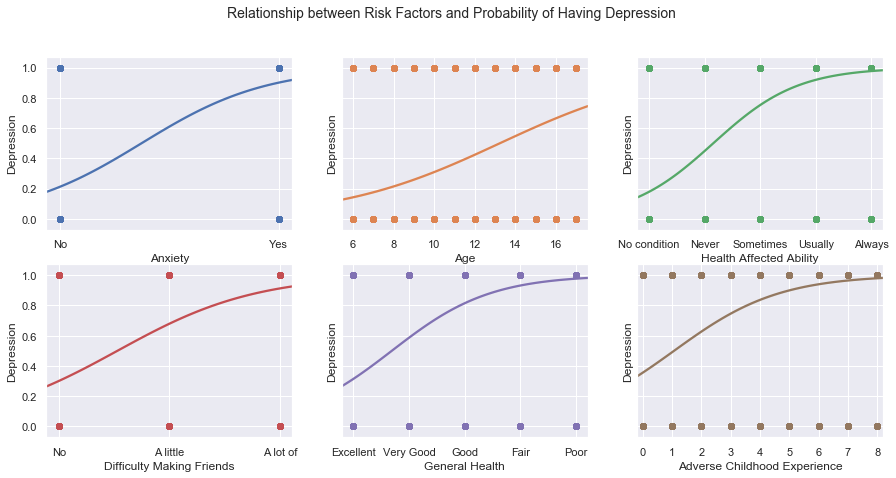

In [59]:
f, axes = plt.subplots(2, 3, figsize=(15, 7), sharey=True, sharex=False)
f.suptitle("Relationship between Risk Factors and Probability of Having Depression", fontsize=14)
sns.regplot(x='Anxiety', y="Depression", data=df, logistic=True, ax=axes[0, 0])
sns.regplot(x='Age', y="Depression", data=df, logistic=True, ax=axes[0, 1])
sns.regplot(x='Health Affected Ability', y="Depression", data=df, logistic=True, ax=axes[0, 2])
sns.regplot(x='Difficulty Making Friends', y="Depression", data=df, logistic=True, ax=axes[1, 0])
sns.regplot(x='General Health', y="Depression", data=df, logistic=True, ax=axes[1, 1])
sns.regplot(x='Adverse Childhood Experience', y="Depression", data=df, logistic=True, ax=axes[1, 2])

plt.sca(axes[0, 0])
plt.xticks([0, 1], ['No', 'Yes'])
plt.sca(axes[0, 2])
plt.xticks([1, 2, 3, 4, 5], ['No condition', 'Never', 'Sometimes', 'Usually', 'Always'])
plt.sca(axes[1, 0])
plt.xticks([1, 2, 3], ['No', 'A little', 'A lot of'])
plt.sca(axes[1, 1])
plt.xticks([1, 2, 3, 4, 5], ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'])
plt.sca(axes[1, 2])
plt.xticks(range(0, 9))
plt.xlim((-0.2, 8.2))
plt.show()

Critique

The data used to create the plot is collected through the National Survey of Children’s Health (NSCH). The plot that I created visualizes 6 features in the dataset that are most predictive of early-onset depression. 

*Is it truthful?*

Truthfulness is on a continuum and partly depends on the research design and the data. The plot here intended to demonstrate the relationship between a series of risk factors and the possibility of having a diagnosis of depression. There are many ways to design research and collect data about children. Depending on the questionnaire and population, the visualization might look different. NSCH survey is just one of the datasets that are made available to the public. However, this data is the best that I can find that is both accessible and relative to my research question. The NSCH collects information about the physical and emotional health of children between 0 to 17 years old. Questions in the survey include access to - and quality of - health care, family structures, and environment, parental health, neighborhood characteristics, as well as school and after-school experiences (US Census Bureau, 2019). 

An absolute truthful representation of the dataset might be to create a plot using every single information in the NSCH survey without changing anything. However, NSCH dataset has over 300 variables, three different forms for different age groups, many missing data, and an unbalanced outcome variable. Such a plot would be very hard to interpret and my goal was to just emphasize those important ones.

As a result, I used a machine learning model - random forest - to select the top 10 most important features and to plot 6 of those features in relation to depression diagnose. In sum, I think that this graph tried its best to truthfully represent the dataset that is given.

*Is it functional?*

Again, the purpose of the graph is to visualize the relationship between selected risk factors and early-onset depression. 

I chose logistic regression to visualize this relationship because the outcome variable only contains two categories: has a depression diagnose and do not have a depression diagnose. A log-odd would be hard to interpret for the audience, so I chose to plot the y-axis as the probability of having a depression diagnose. 

In addition, to make the graph more interpretable, I added labels for all x-axes, y-axes, as well as the labels for categorical variables. The audience should be able to understand the graph without any further explanations.

*Is it beautiful?*

I think that people may have different aesthetic standards. My goal was to plot a graph that represents the most important information from the dataset. I wanted the graph to look simple with no redundant information but not too boring at the same time. Since there are a total of ten features that need to be displayed on the graph, I arranged them into a 2 x 3 table. In this way, people would be able to see the graph immediately without having to scroll down the pages. Also, I chose to use the “seaborn” package from python, which contains a variety of color palettes and built-in themes. Therefore, each subplot in the graph has a different color and it makes the overall graph more aesthetically pleasing.

*Is it insightful?*

The potential audience for this graph are researchers in early-onset depression. Many research in developmental psychology shows that almost any type of negative early childhood experience may potentially serve as a risk factor for maladaptive development. Too much information sometimes makes people lose focus. This graph, instead, is developed from a machine learning model that selected ten important features from a relatively large dataset. I hope that clinicians who look at this graph may gain some insights about what is important to consider when they evaluate children whether they are at risk for early-onset depression.

*Is it enlightening?*

I chose this topic because I believe that intervention is better than cure. I hope to provide a tool that psychologists can use to identify children at risk for depression very quickly. The graph shows the risk factors and their relationship to the possibility of depression diagnose. I believe that that information is not only enlightening for researchers but also useful for the general public in the sense that people would pay more attention to factors that would potentially lead to depression. For example, schools may take actions to remedy issues regarding bullying. Parents may pay more attention to children’s mental health and etc. Overall, I believe that this is an enlightening graph. 
